## Greek Calculations Using the Black-Scholes Model

The **Greeks** are fundamental sensitivity measures that help assess how different factors affect the price of an option. These are calculated using partial derivatives of the option pricing formulas provided by the Black-Scholes model. The most commonly calculated Greeks are **Delta**, **Gamma**, **Vega**, **Theta**, and **Rho**. Below is a quick overview of how each Greek is derived and interpreted using the Black-Scholes model for European-style options (with no dividends).

In [20]:
import scipy
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

### 2. **Normal PDF: $( \text{PDF}(x) $)**

The function `PDF(x)` calculates the **Probability Density Function (PDF)** of the standard normal distribution. The standard normal PDF describes the relative likelihood for a random variable to take on a specific value.


In [21]:
def N(x):
	return (1.0 + np.sign(x) * np.sqrt(1.0 - np.exp(-x**2 * (2.0 / np.pi) / (1.0 + 0.2316419 * abs(x))))) / 2.0

def PDF(x):
	return np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)

In [22]:
s = 100
k = 100
r = 0.05
vol = 0.25
T = 1
spots = np.linspace(1, 199, 100)

This visualization helps in understanding the relationship between the PDF (instantaneous probability) and the CDF (cumulative probability).

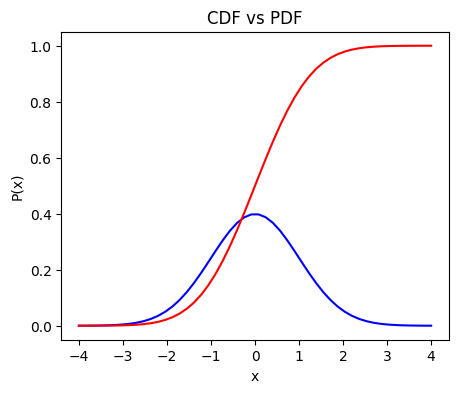

In [23]:
x = np.linspace(-4, 4, 50)
fig=plt.figure(figsize=(5,4))

xy = fig.add_subplot()
xy.plot(x, PDF(x), color="blue")
xy.plot(x, scipy.stats.norm.cdf(x), color="red")

xy.set_xlabel('x')
xy.set_ylabel('P(x)')
xy.set_title("CDF vs PDF")
plt.show()

### 1. Delta ($ \Delta $)

Delta measures the sensitivity of the option's price to changes in the underlying asset's price (\$ S_0 \$).

- **Call Option Delta**:
  $
  \Delta_{\text{call}} = N(d_1)
  $
  
- **Put Option Delta**:
  $
  \Delta_{\text{put}} = N(d_1) - 1
  $

Where:
$
d_1 = \frac{\ln\left( \frac{S_0}{X} \right) + \left( r + \frac{\sigma^2}{2} \right) T}{\sigma \sqrt{T}}
$

In [24]:
def delta(type, s, k, r, vol, T):
	d1 = (np.log(s/k) + (r+(vol**2)/2) * T)/(vol*(np.sqrt(T)))
	return N(d1) if type == "call" else -N(d1)

In [25]:
print("Delta Call :", delta("call", s, k, r, vol, T), "Delta Put :", delta("put", s, k, r, vol, T))

Delta Call : 0.6231055497912004 Delta Put : -0.6231055497912004


#### 1. **Call Option Delta**

**Call Delta** ($ \Delta_{\text{call}} $) generally ranges from 0 to 1. As the spot price increases, the Delta of the call option approaches 1, indicating that the option behaves similarly to the underlying asset (i.e., a 1:1 relationship between changes in the underlying price and the option price when deep in-the-money).

#### 2. **Put Option Delta**

**Put Delta** ($ \Delta_{\text{put}} $) generally ranges from -1 to 0. As the spot price decreases, the Delta of the put option approaches -1, meaning that the option gains value as the underlying asset price declines (a 1:1 negative relationship for deep in-the-money puts).

Both visualizations help understand how the **sensitivity** of the option price (Delta) changes with the spot price, providing insight into hedging strategies and how options behave in different market conditions.

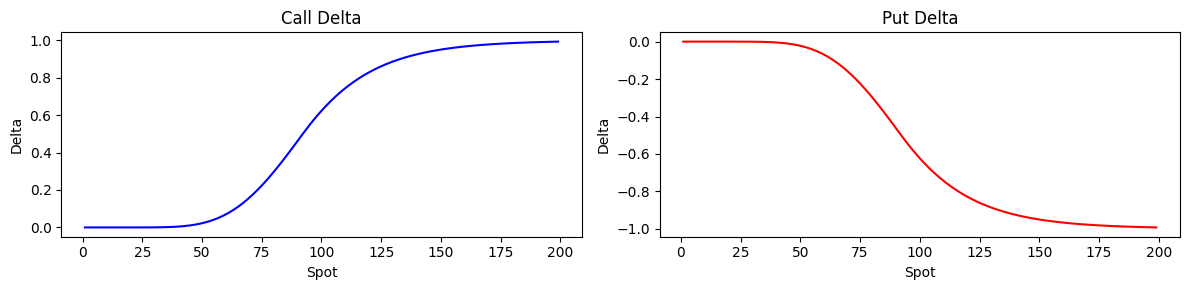

In [26]:
fig=plt.figure(figsize=(12, 3))

xy1 = fig.add_subplot(121)
xy1.plot(spots, delta("call", spots, k, r , vol, T), color="blue")
xy1.set_title('Call Delta')
xy1.set_xlabel('Spot')
xy1.set_ylabel('Delta')

xy2 = fig.add_subplot(122)
xy2.plot(spots, delta("put", spots, k, r , vol, T), color="red")
xy2.set_title('Put Delta')
xy2.set_xlabel('Spot')
xy2.set_ylabel('Delta')

plt.tight_layout()
plt.show()



#### 1. **Call Delta as a Function of Spot Price and Volatility**

In the first plot, Delta is calculated for different **spot prices** and **volatilities**, keeping the time to maturity constant.

As volatility increases, the **Delta** becomes less sensitive to the spot price. This is because with higher volatility, the option is more likely to expire in-the-money, leading to a smoother Delta.

#### 2. **Call Delta as a Function of Spot Price and Time to Maturity**

In the second plot, Delta is calculated for different **spot prices** and **time to maturities**, keeping volatility constant.

As time approaches expiration, the Delta of the option becomes more extreme, particularly for in-the-money and out-of-the-money options. The Delta for in-the-money options approaches 1, while for out-of-the-money options it approaches 0.

These visualizations are useful for understanding how the sensitivity of the option price to the underlying asset changes based on different market conditions, such as varying volatility and time to expiration.


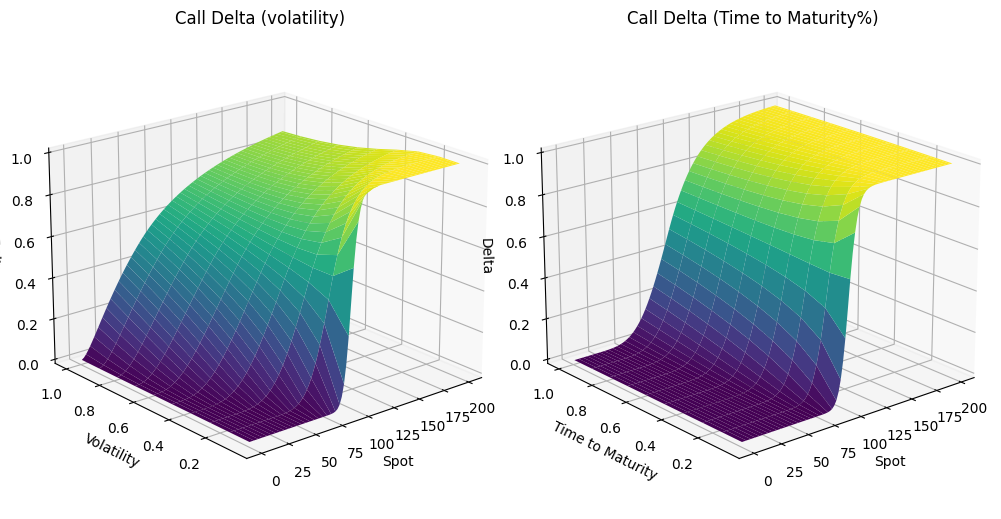

In [27]:
volatilities = np.linspace(0.05, 1, 10)
maturities = np.linspace(0.05, 1, 10)

pSpots, pVol = np.meshgrid(spots, volatilities)
pSpots, pExpiry = np.meshgrid(spots, maturities)

deltaCallsVol = delta("call", pSpots, k, r , pVol, T)
deltaCallsExpiry = delta("call", pSpots, k, r , vol, pExpiry)

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(pSpots, pVol, deltaCallsVol, cmap='viridis')
ax.view_init(elev=20, azim=-130)
ax.set_xlabel('Spot')
ax.set_ylabel('Volatility')
ax.set_zlabel('Delta')
ax.set_title('Call Delta (volatility)')

bx = fig.add_subplot(122, projection='3d')
bx.plot_surface(pSpots, pExpiry, deltaCallsExpiry, cmap='viridis')
bx.view_init(elev=20, azim=-130)
bx.set_xlabel('Spot')
bx.set_ylabel('Time to Maturity')
bx.set_zlabel('Delta')
bx.set_title("Call Delta (Time to Maturity%)")

plt.tight_layout()
plt.show()

### 2. Gamma ($ \Gamma $)

Gamma measures the rate of change of delta with respect to changes in the underlying asset price.

$
\Gamma = \frac{N'(d_1)}{S_0 \sigma \sqrt{T}} = \frac{e^{-d_1^2/2}}{S_0 \sigma \sqrt{2\pi T}}
$

In [28]:
def gamma(type, s, k, r, vol, T):
	d1 = (np.log(s/k) + (r+(vol**2)/2) * T)/(vol*(np.sqrt(T)))
	return PDF(d1)/(s*vol*np.sqrt(T)) if type == "call" else -PDF(d1)/(s*vol*np.sqrt(T))

#### 1. **Call Option Gamma**
- Gamma is highest for **at-the-money** options, as the sensitivity of Delta to the underlying price is greatest when the option is close to the strike price.

#### 2. **Put Option Gamma**

- The **Gamma** for put options is typically the same as for call options because Gamma reflects the curvature of the option price with respect to the underlying asset price, and this curvature is symmetric for both calls and puts:
  $
  \Gamma_{\text{call}} = \Gamma_{\text{put}}
  $

Both plots show how Gamma spikes for options near the strike price, and flattens out for deep in-the-money or out-of-the-money options. Gamma helps in understanding how **Delta** will change in response to movements in the spot price, which is crucial for managing option portfolios.

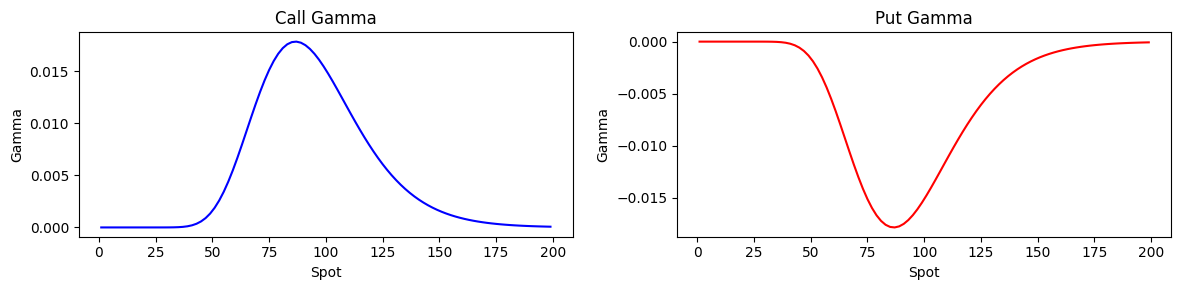

In [29]:
fig=plt.figure(figsize=(12, 3))

xy1 = fig.add_subplot(121)
xy1.plot(spots, gamma("call", spots, k, r , vol, T), color="blue")
xy1.set_title('Call Gamma')
xy1.set_xlabel('Spot')
xy1.set_ylabel('Gamma')

xy2 = fig.add_subplot(122)
xy2.plot(spots, gamma("put", spots, k, r , vol, T), color="red")
xy2.set_title('Put Gamma')
xy2.set_xlabel('Spot')
xy2.set_ylabel('Gamma')

plt.tight_layout()
plt.show()

#### 1. **Call Gamma as a Function of Spot Price and Volatility**

In the first plot, **Gamma** is calculated for different **spot prices** and **volatilities**, keeping time to maturity \( T \) constant.

Gamma is generally highest for options at-the-money, and decreases for deep in-the-money or deep out-of-the-money options. As **volatility** increases, the Gamma tends to smooth out, as higher volatility makes the option price more sensitive to movements in the underlying asset price.

#### 2. **Call Gamma as a Function of Spot Price and Time to Maturity**

In the second plot, **Gamma** is calculated for different **spot prices** and **times to maturity**, keeping volatility constant.

As the option approaches expiration, **Gamma** becomes more concentrated around the at-the-money point, where it spikes sharply. This is because the option's Delta is most sensitive to changes in the spot price when it is near the strike price as expiration approaches.

These visualizations highlight how **Gamma** behaves under different market conditions, helping to understand second-order sensitivities in option pricing models.


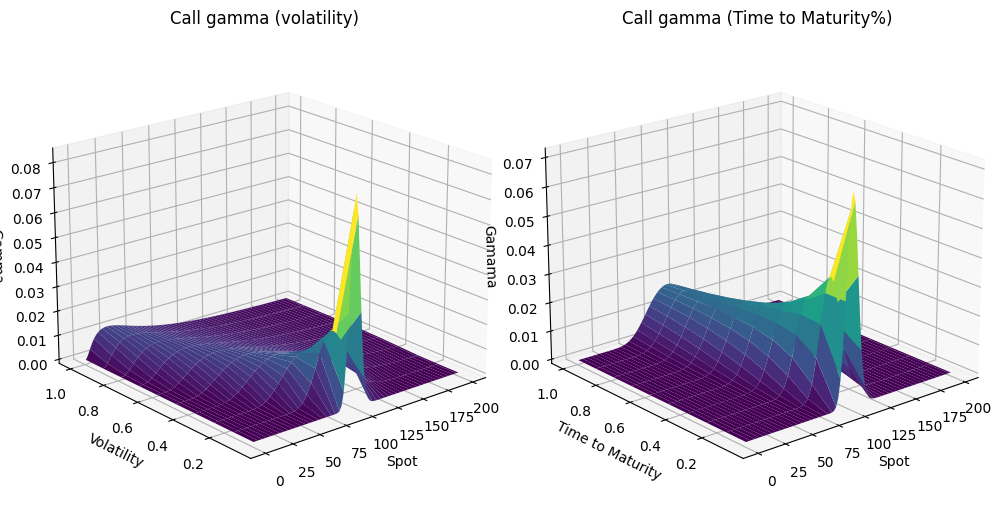

In [30]:
volatilities = np.linspace(0.05, 1, 10)
maturities = np.linspace(0.05, 1, 10)

pSpots, pVol = np.meshgrid(spots, volatilities)
pSpots, pExpiry = np.meshgrid(spots, maturities)

gammaCallsVol = gamma("call", pSpots, k, r , pVol, T)
gammaCallsExpiry = gamma("call", pSpots, k, r , vol, pExpiry)

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(pSpots, pVol, gammaCallsVol, cmap='viridis')
ax.view_init(elev=20, azim=-130)
ax.set_xlabel('Spot')
ax.set_ylabel('Volatility')
ax.set_zlabel('Gamma')
ax.set_title('Call gamma (volatility)')

bx = fig.add_subplot(122, projection='3d')
bx.plot_surface(pSpots, pExpiry, gammaCallsExpiry, cmap='viridis')
bx.view_init(elev=20, azim=-130)
bx.set_xlabel('Spot')
bx.set_ylabel('Time to Maturity')
bx.set_zlabel('Gamama')
bx.set_title("Call gamma (Time to Maturity%)")

plt.tight_layout()
plt.show()

### 4. Theta ($ \Theta $)

Theta measures the time decay of the option price, or how much the price decreases as time passes.

- **Call Option Theta**:
  $
  \Theta_{\text{call}} = -\frac{S_0 N'(d_1) \sigma}{2 \sqrt{T}} - r X e^{-rT} N(d_2)
  $

- **Put Option Theta**:
  $
  \Theta_{\text{put}} = -\frac{S_0 N'(d_1) \sigma}{2 \sqrt{T}} + r X e^{-rT} N(-d_2)
  $

In [31]:
def theta(type, s, k, r, vol, T):
	d1 = (np.log(s/k) + (r+(vol**2)/2) * T)/(vol*(np.sqrt(T)))
	d2 = d1 - vol * np.sqrt(T)
	return -((s-PDF(d1)*vol)/(2*np.sqrt(T))) - r*k*np.exp(-r*T)*N(d2) if type == "call" else -((s-PDF(d1)*vol)/(2*np.sqrt(T))) + r*k*np.exp(-r*T)*N(d2)

#### 1. **Call Option Theta**

For call options, Theta is generally negative, indicating that the option loses value as it approaches expiration. The loss is usually more pronounced for at-the-money options, where the time value is highest.

#### 2. **Put Option Theta**
  
Similar to call options, put options also exhibit negative Theta, indicating time decay. However, the rate of decay can differ depending on the option's position (in-the-money, at-the-money, or out-of-the-money). 

Both plots show how Theta behaves as the time to maturity increases from 1 to 100 %. As expiration approaches (1%), the negative impact of Theta on option pricing becomes more significant, providing insights into the time-sensitive nature of options trading. 

These visualizations are valuable for traders to understand how the **Theta** of options changes over time, assisting in developing effective trading strategies.


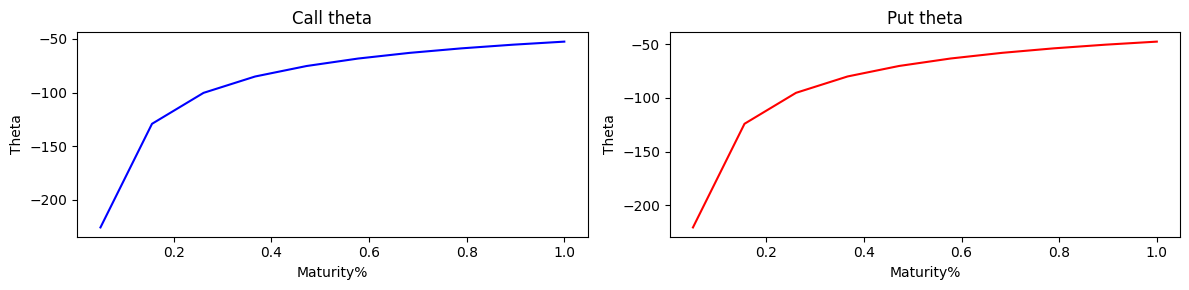

In [32]:
maturitues = np.linspace(1, 100, 99)

fig=plt.figure(figsize=(12, 3))

xy1 = fig.add_subplot(121)
xy1.plot(maturities, theta("call", s, k, r , vol, maturities), color="blue")
xy1.set_title('Call theta')
xy1.set_xlabel('Maturity%')
xy1.set_ylabel('Theta')

xy2 = fig.add_subplot(122)
xy2.plot(maturities, theta("put", s, k, r , vol, maturities), color="red")
xy2.set_title('Put theta')
xy2.set_xlabel('Maturity%')
xy2.set_ylabel('Theta')

plt.tight_layout()
plt.show()

### 3. Vega ($ \nu $)

Vega measures the sensitivity of the option's price to changes in the volatility (\$ \sigma \$) of the underlying asset.

$
\text{Vega} = S_0 \cdot N'(d_1) \cdot \sqrt{T}
$

In [33]:
def vega( s, k, r, vol, T):
	d1 = (np.log(s/k) + (r+(vol**2)/2) * T)/(vol*(np.sqrt(T)))
	return (s*np.sqrt(T)*PDF(d1))/100

#### Call Option Vega
In general, Vega is highest for at-the-money options, indicating that changes in volatility have a greater impact on the option's price when the option is near the strike price. As the spot price moves further away from the strike price (either in-the-money or out-of-the-money), Vega tends to decrease.

This plot provides insights into how the Vega of a call option varies with changes in the underlying asset's spot price.


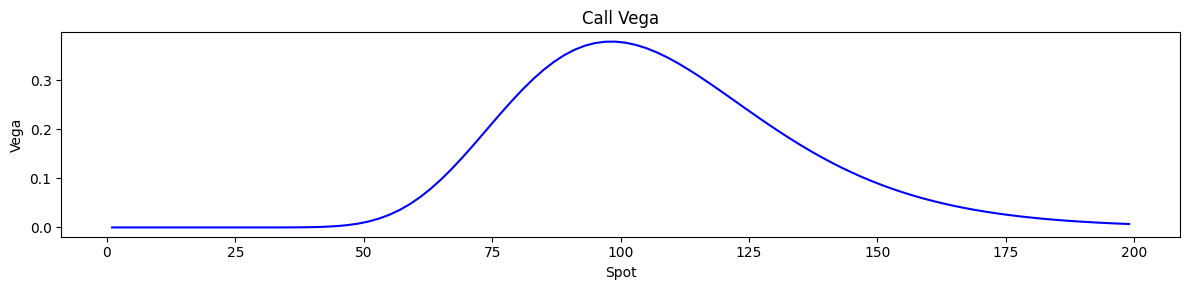

In [34]:
fig=plt.figure(figsize=(12, 3))

xy1 = fig.add_subplot(111)
xy1.plot(spots, vega(spots, k, r , vol, T), color="blue")
xy1.set_title('Call Vega')
xy1.set_xlabel('Spot')
xy1.set_ylabel('Vega')

plt.tight_layout()
plt.show()

### 5. Rho ($ \rho $)

Rho measures the sensitivity of the option's price to changes in the risk-free interest rate (\$ r \$).

- **Call Option Rho**:
  $
  \rho_{\text{call}} = X T e^{-rT} N(d_2)
  $

- **Put Option Rho**:
  $
  \rho_{\text{put}} = -X T e^{-rT} N(-d_2)
  $

In [35]:
def rho(type, s, k, r, vol, T):
	d1 = (np.log(s/k) + (r+(vol**2)/2) * T)/(vol*(np.sqrt(T)))
	d2 = d1 - vol * np.sqrt(T)
	return (k*T*np.exp(-r*T)*N(d2))/100 if type == "call" else (-k*T*np.exp(-r*T)*N(-d2))/100

#### 1. Call Option Rho
For call options, Rho is typically positive, meaning that an increase in the risk-free rate increases the option’s price. This is because higher interest rates reduce the present value of the strike price, making the option more valuable.

#### 2. Put Option Rho
In contrast to call options, **put option Rho** is generally negative. This means that an increase in the risk-free rate decreases the put option's price. Higher interest rates reduce the value of the strike price payout in present terms, making the put option less valuable.



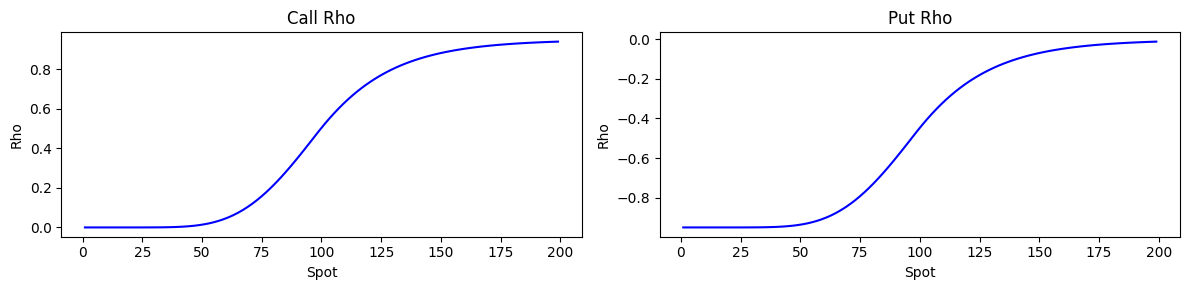

In [36]:
fig=plt.figure(figsize=(12, 3))

xy1 = fig.add_subplot(121)
xy1.plot(spots, rho("call", spots, k, r , vol, T), color="blue")
xy1.set_title('Call Rho')
xy1.set_xlabel('Spot')
xy1.set_ylabel('Rho')

xy1 = fig.add_subplot(122)
xy1.plot(spots, rho("put", spots, k, r , vol, T), color="blue")
xy1.set_title('Put Rho')
xy1.set_xlabel('Spot')
xy1.set_ylabel('Rho')

plt.tight_layout()
plt.show()